## Building Linear Models

#### Building the base simple linear regression modelling

The model will use the most correlated feature with price which as the predictor variable with price being our target feature. We are trying to predict the value of price using the best feature.

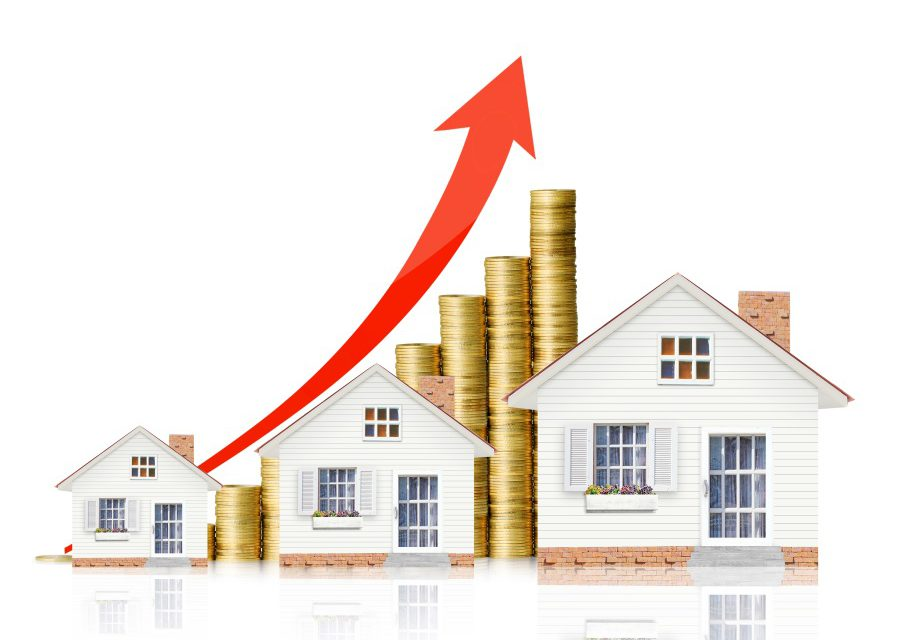

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

#loading the data
kc_hse = pd.read_csv('data/kc_cleaned.csv', index_col=0)

#Previewing the data frame
kc_hse.head()

,price,price_log,sqft_above,sqft_above_log,sqft_lot,sqft_lot_log,sqft_living15,sqft_living15_log,sqft_lot15,house_age,...,zip_G,zip_H,zip_I,water_1,base_1.0,reno_1.0,cond_1.0,cond_2.0,cond_3.0,cond_4.0
0,221900.0,12.309982,1180,7.073270,5650,8.639411,1340,7.200425,5650,59,...,0,0,0,0,0,0,0,0,0,1
1,538000.0,13.195614,2170,7.682482,7242,8.887653,1690,7.432484,7639,63,...,0,0,0,0,1,1,0,0,0,1
2,180000.0,12.100712,770,6.646391,10000,9.210340,2720,7.908387,8062,82,...,0,0,0,0,0,1,0,0,0,1
3,604000.0,13.311329,1050,6.956545,5000,8.517193,1360,7.215240,5000,49,...,0,0,0,0,1,0,0,0,1,0
4,510000.0,13.142166,1680,7.426549,8080,8.997147,1800,7.495542,7503,28,...,1,0,0,0,0,0,0,0,0,1


In [3]:
kc_hse.columns

Index(['price', 'price_log', 'sqft_above', 'sqft_above_log', 'sqft_lot',
       'sqft_lot_log', 'sqft_living15', 'sqft_living15_log', 'sqft_lot15',
       'house_age', 'bedrooms', 'bathrooms', 'floors', 'zip_B', 'zip_C',
       'zip_D', 'zip_E', 'zip_F', 'zip_G', 'zip_H', 'zip_I', 'water_1',
       'base_1.0', 'reno_1.0', 'cond_1.0', 'cond_2.0', 'cond_3.0', 'cond_4.0'],
      dtype='object')

In [4]:
#creating a correlation matrix to find which feature is most likely to have a linear relationship with price
matrix = kc_hse.corr()
matrix

,price,price_log,sqft_above,sqft_above_log,sqft_lot,sqft_lot_log,sqft_living15,sqft_living15_log,sqft_lot15,house_age,...,zip_G,zip_H,zip_I,water_1,base_1.0,reno_1.0,cond_1.0,cond_2.0,cond_3.0,cond_4.0
price,1.000000,0.891745,0.605368,0.542675,0.089876,0.161561,0.585241,0.543829,0.082845,-0.053890,...,0.079515,-0.145615,-0.016485,0.255706,0.175472,0.054330,-0.051432,-0.030759,0.057531,0.006948
price_log,0.891745,1.000000,0.601579,0.586013,0.100025,0.138261,0.619326,0.607154,0.092281,-0.080499,...,0.137296,-0.188022,0.000833,0.167072,0.206368,0.047065,-0.086095,-0.040810,0.061148,0.021932
sqft_above,0.605368,0.601579,1.000000,0.962547,0.184139,0.331686,0.731767,0.701745,0.195077,-0.424386,...,0.197731,0.043475,0.092866,0.071066,-0.206511,0.004211,-0.057698,-0.142520,-0.088596,0.194238
sqft_above_log,0.542675,0.586013,0.962547,1.000000,0.163623,0.318663,0.715000,0.713102,0.176771,-0.451757,...,0.199741,0.061639,0.093423,0.058853,-0.212167,0.003236,-0.069411,-0.134541,-0.088199,0.189405
sqft_lot,0.089876,0.100025,0.184139,0.163623,1.000000,0.638608,0.144763,0.145162,0.718204,-0.052853,...,0.084945,0.115519,0.103826,0.025096,-0.033979,-0.005381,0.037871,0.013284,-0.014452,-0.011589
sqft_lot_log,0.161561,0.138261,0.331686,0.318663,0.638608,1.000000,0.363628,0.363743,0.623644,0.007181,...,0.115263,0.118324,0.102822,0.069015,-0.050971,0.001948,0.039071,0.122765,-0.002852,-0.120024
sqft_living15,0.585241,0.619326,0.731767,0.715000,0.144763,0.363628,1.000000,0.976819,0.183515,-0.326697,...,0.210007,0.005383,0.066575,0.082311,0.042275,-0.006457,-0.052141,-0.074361,-0.061473,0.113671
sqft_living15_log,0.543829,0.607154,0.701745,0.713102,0.145162,0.363743,0.976819,1.000000,0.178371,-0.334120,...,0.207068,0.015090,0.061836,0.075984,0.060837,-0.008951,-0.055987,-0.066300,-0.064094,0.108434
sqft_lot15,0.082845,0.092281,0.195077,0.176771,0.718204,0.623644,0.183515,0.178371,1.000000,-0.070770,...,0.111288,0.120782,0.094065,0.032188,-0.039952,-0.004512,0.022377,0.020645,-0.017569,-0.012933
house_age,-0.053890,-0.080499,-0.424386,-0.451757,-0.052853,0.007181,-0.326697,-0.334120,-0.070770,1.000000,...,-0.208278,-0.149662,-0.108217,0.020179,0.163949,0.095451,0.067242,0.257028,0.243626,-0.390928


In [5]:
print(matrix['price'].sort_values(ascending=False))

price                1.000000
price_log            0.891745
sqft_above           0.605368
sqft_living15        0.585241
sqft_living15_log    0.543829
sqft_above_log       0.542675
bathrooms            0.525906
bedrooms             0.315954
zip_C                0.270264
floors               0.256804
water_1              0.255706
base_1.0             0.175472
sqft_lot_log         0.161561
sqft_lot             0.089876
sqft_lot15           0.082845
zip_B                0.082708
zip_G                0.079515
cond_3.0             0.057531
reno_1.0             0.054330
cond_4.0             0.006948
zip_I               -0.016485
cond_2.0            -0.030759
cond_1.0            -0.051432
house_age           -0.053890
zip_E               -0.139815
zip_H               -0.145615
zip_D               -0.177290
zip_F               -0.198038
Name: price, dtype: float64


In [6]:
# Building a baseline model
# naming variables
y = kc_hse['price']
X_base = kc_hse[['sqft_above']]

In [7]:
#Baseline model
baseline_model = sm.OLS(endog = y, exog = sm.add_constant(X_base)).fit()
baseline_results = baseline_model.summary()
print(baseline_results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:00:57   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.0

#### Model interpretation:

The model is significant at 5 % level of significance with the probability value of the F-test being 0.00 which is less than 0.05.
The model explains 36.6 % of the variation in price of houses in king county, shown by the value of R squared which is 0.366.
The coefficients of the model are statistically significant  with the probability of their respective t-tests being 0.00 which is less than 0.05.

##### Coefficients:

For a house with **sqft_above** value of zero, the price is expected to be around 60,000 dollars.
For a unit increase in **sqft_above** of the house, there is a resultant increase in price of the house by about 268 dollars. 

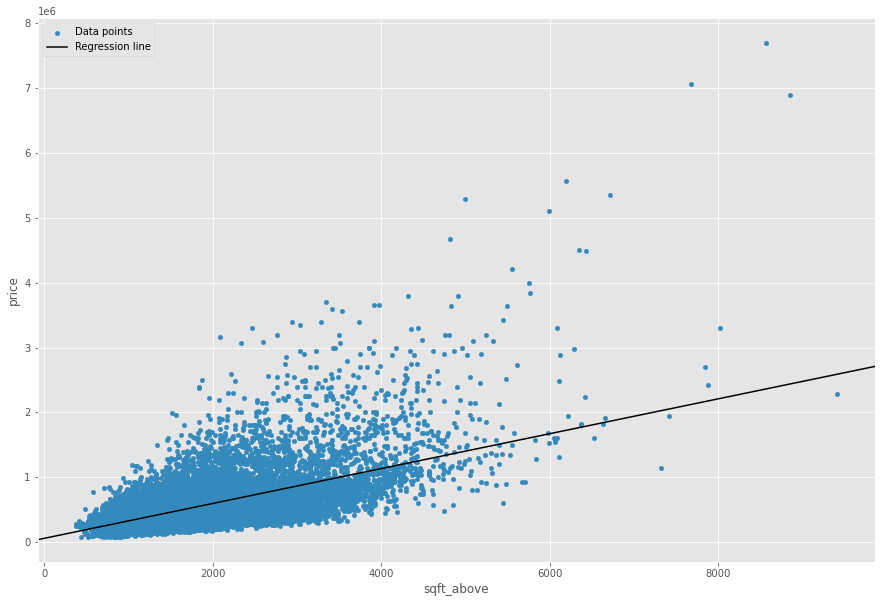

In [8]:
# checking linearity
fig, ax = plt.subplots(figsize=(15,10))
kc_hse.plot.scatter(x="sqft_above", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_model, label="Regression line", ax=ax, color="black")
ax.legend();

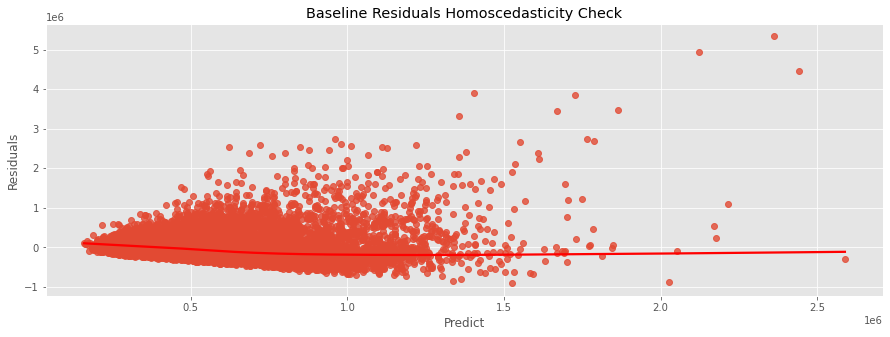

In [9]:
#plotting the residuals for homoscedasticity
plt.figure(figsize = (15, 5))
sns.regplot(x = baseline_model.predict(), 
            y = baseline_model.resid, 
            lowess = True, 
            line_kws = {'color': 'red'})
plt.title('Baseline Residuals Homoscedasticity Check')
plt.xlabel('Predict')
plt.ylabel('Residuals')
plt.show()

Text(0.5, 0.98, 'Is it normally distributed?')

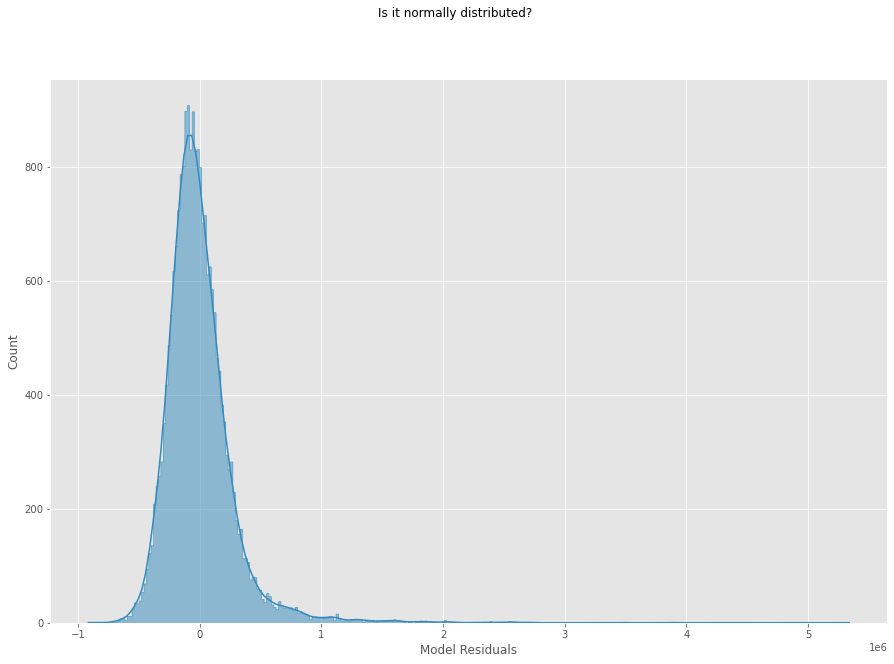

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(baseline_model.resid, bins='auto', element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is it normally distributed?")

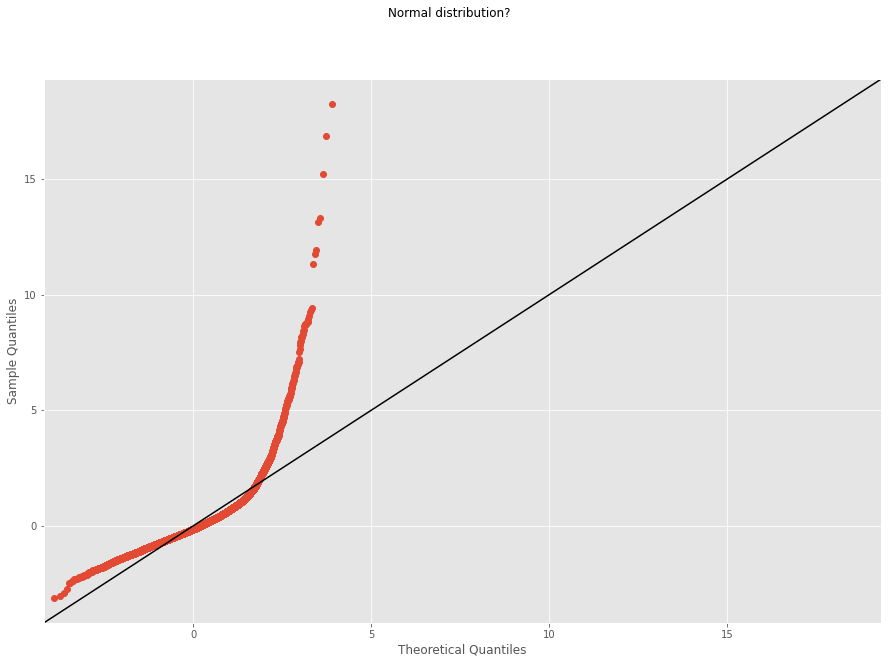

In [11]:
# Q-Q plot to test for normality
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Normal distribution?");

The distribution shown by the Q-Q plot is not normally distributed
From the above tests for normality, we conclude that the distribution neither homoscedastic nor normally distributed and the study proposes that a log transformation could be attempted to help achieve these assumptions of linear regression.

#### Feature Engineering
##### Log transformation
The study chose to log transform the target feature (**price**).

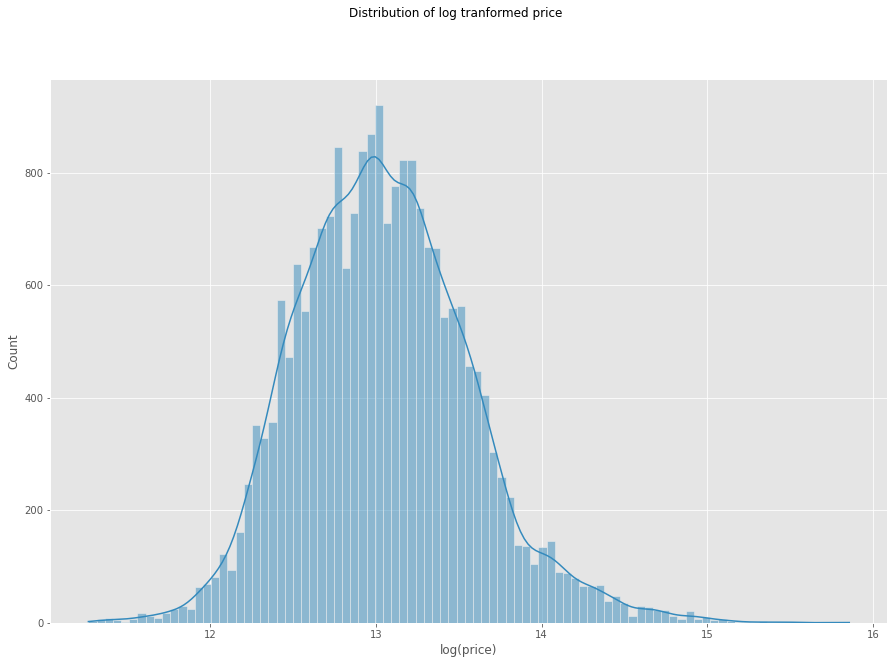

In [12]:
#transforming the target feature
y_log = y.copy()
y_log = np.log(y_log)
y_log.name = 'log(price)'

#plotting the transformed target feature to look at normality
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(y_log, kde = True)
plt.suptitle('Distribution of log tranformed price');

Text(0.5, 0.98, 'Distribution of log transformed square feet above')

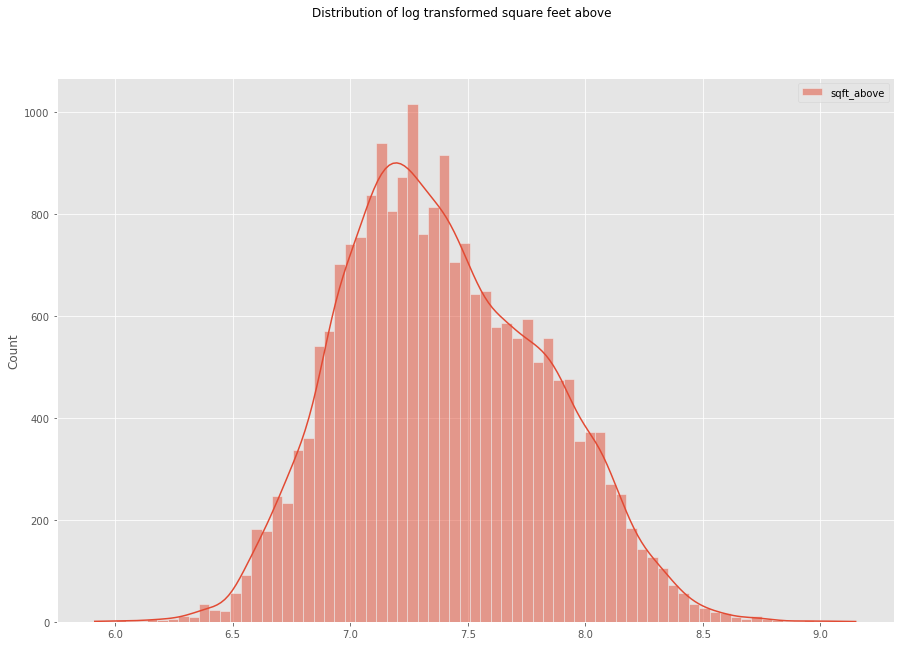

In [13]:
# log transforming the predictor feature
X_base_log = X_base.copy()
X_base_log = np.log(X_base_log)
X_base_log.name = 'log(sqft_above)'

#Plotting the log transformed predictor feature
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(X_base_log, kde=True)
plt.suptitle("Distribution of log transformed square feet above")

This does not look normal thus we will go with the **X_base** as it is

In [14]:
# baseline_log_model with untransformed predictor variable
baseline_log_model = sm.OLS(y_log, sm.add_constant(X_base)).fit()
baseline_log_results = baseline_log_model.summary()
print(baseline_log_results)

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.225e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:01:06   Log-Likelihood:                -11941.
No. Observations:               21597   AIC:                         2.389e+04
Df Residuals:                   21595   BIC:                         2.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3638      0.007   1814.220      0.0

#### Model interpretation:

The model is significant at 5 % level of significance with the probability value of the F-test being 0.00 which is less than 0.05.
The model explains 36.2 % of the variation in price of houses in king county, shown by the value of R squared which is 0.362.
The coefficients of the model are statistically significant  with the probability of their respective t-tests being 0.00 which is less than 0.05.

##### Coefficients:

For a 1 unit increase in the **sqft_above** of a house, there results a 0.04 % increase in the price of a house

#### Model overview
The model explains only 36.2% of the variation in price, implying that most of the variation in price (63.8%) is not explained by the model thus the study will continue to a multiple linear regression model with reference categories formed by categorical variables.

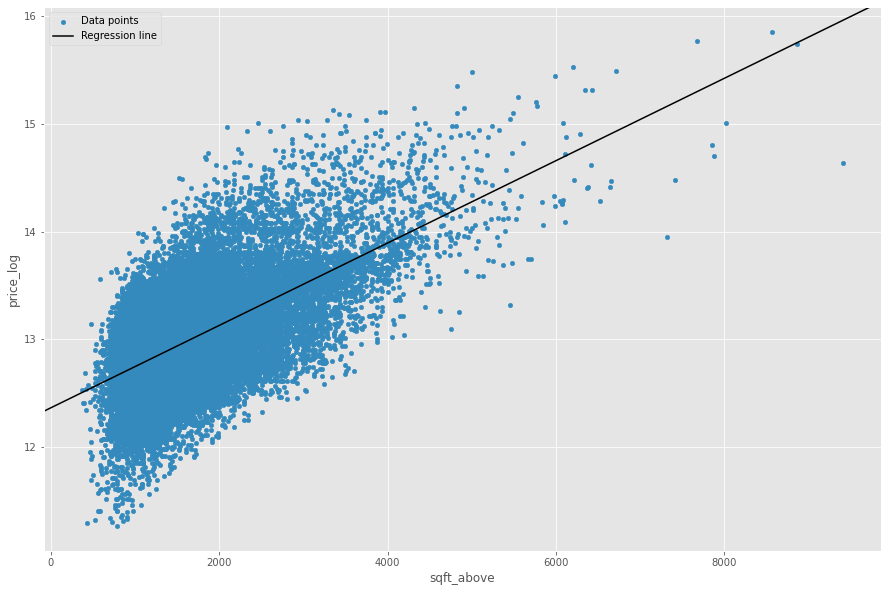

In [15]:
# Checking for Linearity
fig, ax = plt.subplots(figsize=(15,10))
kc_hse.plot.scatter(x="sqft_above", y="price_log", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_log_model, label="Regression line", ax=ax, color="black")
ax.legend();

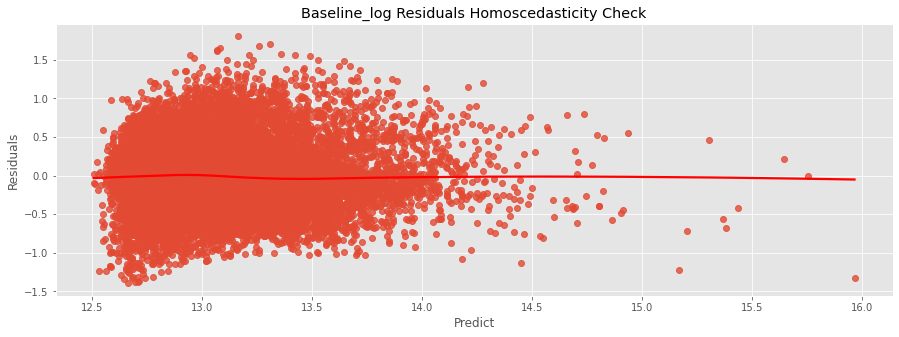

In [16]:
#plotting residuals to test for homoscedasticity
#plotting the residuals for homoscedasticity
plt.figure(figsize = (15, 5))
sns.regplot(x = baseline_log_model.predict(), 
            y = baseline_log_model.resid, 
            lowess = True, 
            line_kws = {'color': 'red'})
plt.title('Baseline_log Residuals Homoscedasticity Check')
plt.xlabel('Predict')
plt.ylabel('Residuals')
plt.show()

It seems like it is close to homoscedasticity

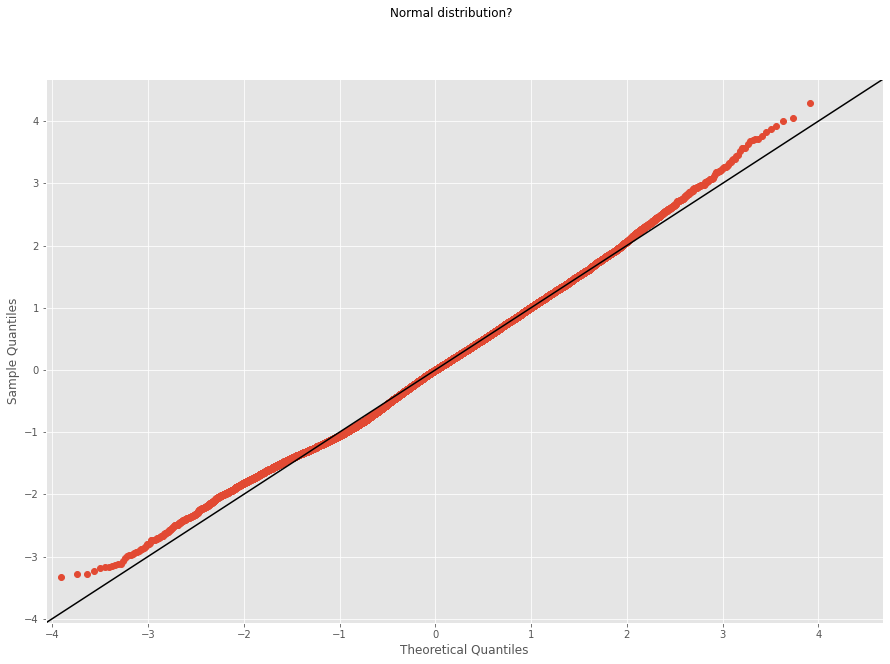

In [17]:
#Q-Q plot to test for normality
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.qqplot(baseline_log_model.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Normal distribution?");

The model looks very close to a normal distribution and also very close to being homoscedastic but the adjusted R squared value is pretty low thus the study will continue to build a multiple linear regression model.

### Building A Multiple Linear Regression Model

In [18]:
features_log = kc_hse[['price_log', 
                            'sqft_above', 'sqft_living15',
                            'house_age', 'bedrooms', 'bathrooms', 'floors',
                            'water_1', 'base_1.0', 'reno_1.0',
                            'cond_1.0', 'cond_2.0', 'cond_3.0', 'cond_4.0',
                            'zip_B', 'zip_C', 'zip_E', 'zip_D', 'zip_F', 'zip_G', 'zip_H', 'zip_I']]

#define training variables
X = features_log.drop(['price_log'], axis = 1)
y = features_log['price_log']

The refrence categories for the categorical variables are:
* *water_0* - houses without a waterfront
* *reno_0.0* - houses without renovation done on them
* *base_0.0* - houses without a basement
* *cond_0.0* - houses of a poor condition
* *Zip_A* - houses from Zip area A

In [19]:
#interecept is not included by default and should be added manually
X_in = X
X_intercept = sm.add_constant(X_in) 

#estimation by ordinary least squares (OLS)
kc_housing_model = sm.OLS(y, X_intercept).fit()

#get summary
kc_housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     3205.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:01:12   Log-Likelihood:                -1504.4
No. Observations:               21597   AIC:                             3053.
Df Residuals:                   21575   BIC:                             3228.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6722      0.050    233.364      0.000      11.574      11.770
sqft_above        0.0003   4.38e-06     59.069      0.000       0.000       0.000
sqft_living15     0.0002   4.17e-06     47.400      0.000       0.000       0.000
house_age         0.0021   9.13e-05     22.967      0.000       0.002       0.002
bedrooms         -0.0237      0.002     -9.556      0.000      -0.029      -0.019
bathrooms         0.1045      0.004     25.596      0.000       0.096       0.112
floors            0.0312      0.005      6.608      0.000       0.022       0.040
water_1           0.6219      0.021     29.956      0.000       0.581       0.663
base_1.0          0.1669      0.005     35.892      0.000       0.158       0.176
reno_1.0          0.0206      0.004      4.639      0.000       0.012       0.029
cond_1.0          0.1593      0.052      3.051      0.002       0.057       0.262
cond_2.0          0.4025      0.048      8.313      0.000       0.308       0.497
cond_3.0          0.4480      0.049      9.199      0.000       0.353       0.544
cond_4.0          0.3426      0.048      7.077      0.000       0.248       0.437
zip_B            -0.0988      0.007    -15.061      0.000      -0.112      -0.086
zip_C            -0.0405      0.007     -5.858      0.000      -0.054      -0.027
zip_E            -0.4610      0.008    -58.774      0.000      -0.476      -0.446
zip_D            -0.5512      0.008    -73.148      0.000      -0.566      -0.536
zip_F            -0.6488      0.008    -84.945      0.000      -0.664      -0.634
zip_G            -0.1660      0.008    -21.640      0.000      -0.181      -0.151
zip_H            -0.5352      0.008    -65.351      0.000      -0.551      -0.519
zip_I            -0.2968      0.012    -25.773      0.000      -0.319      -0.274
==============================================================================
Omnibus:                      575.653   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1409.336
Skew:                          -0.058   Prob(JB):                    9.26e-307
Kurtosis:                       4.246   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Interpretation

* Overally, the model is statistically significant with the p value of the F test being 0.00 which is less than the alpha value of 0.05.
* The model explains 75.7% of the variation in house prices in the King County Area shown by the adjusted R squared value of 0.757

##### Coefficients:
* The natural log of price stands at 11.67 if all other features are constant.
* Controlling for all other features, for a unit increase in *sqft_above*, the price of a house in increases by 0.03 %.
* Controlling for all other features, for a unit increase in the square feet of the living area of the 15 nearest neighbours (), the price of a house increases by 0.02 %.
* Controlling for all other features, for a unit increase in the age of the house (*house_age*), the price of the house increases by 0.21 %.
* Controlling for all other features, for a unit increase in the number of *bedrooms*, the price of the house decreases by 2.37 %.
* Controlling for all other features, for a unit increase in the number of *bathrooms*, the price of the house increases by 10.45 %.
* Controlling for all other features, for a unit increase in the number of *floors* in a house, the price of the house increases by 3.12 %
* Controlling for all other features, When a house has a waterfront (*water_1*) compared to a house without a waterfront (*water_0*), the price increases by 62.19 %.
* Controlling for all other features, When a house has a basment (*base_1.0*) compared to a house without a basement (*base_0.0*), the price increases by 16.69 %.
* Controlling for all other features, When a house was renovated (*reno_1.0*) compared to a house that is not renovated (*reno_0.0*), the price increases by 2.06 %.
* Controlling for all other features, When a house has a condition fair condition (*cond_1.0*) in comparison to a house that is of a poor condition (*cond_0.0*), the price of the house increases by 15.93 %.
* Controlling for all other features, When a house has a good condition (*cond_2.0*) in comparison to a house that is of a poor condition (*cond_0.0*), the price of the house increases by 40.25 %.
* Controlling for all other features, When a house has a very good condition (*cond_3.0*) in comparison to a house that is of a poor condition (*cond_0.0*), the price of the house increases by 44.80 %.
* Controlling for all other features, When a house has an excellent condition (*cond_4.0*) in comparison to a house that is of a poor condition (*cond_0.0*), the price of the house increases by 34.26 %.
* Controlling for all other features, When a house is from area *zip_B* in comparison to a house that is from *zip_A* the price decreases by 9.88 %.
* Controlling for all other features, When a house is from area *zip_C* in comparison to a house that is from *zip_A* the price decreases by 4.05 %.
* Controlling for all other features, When a house is from area *zip_E* in comparison to a house that is from *zip_A* the price decreases by 46.10 %.
* Controlling for all other features, When a house is from area *zip_D* in comparison to a house that is from *zip_A* the price decreases by 55.12 %.
* Controlling for all other features, When a house is from area *zip_F* in comparison to a house that is from *zip_A* the price decreases by 64.88 %.
* Controlling for all other features, When a house is from area *zip_G* in comparison to a house that is from *zip_A* the price decreases by 16.60 %.
* Controlling for all other features, When a house is from area *zip_H* in comparison to a house that is from *zip_A* the price decreases by 53.52 %.
* Controlling for all other features, When a house is from area *zip_I* in comparison to a house that is from *zip_A* the price decreases by 29.68 %.

In [20]:
# Your code here - evaluate the baseline model
#coefficients that are statistically significant:
coeff_df = pd.concat([kc_housing_model.params, kc_housing_model.pvalues], axis = 1)
coeff_df.columns = ['coefficient', 'pvalue']

#filtering to have only the significant ones:
coeff_df = coeff_df[coeff_df["pvalue"] < 0.05].sort_values(by="coefficient")
print("R adjusted implies that 75.7% of the variation in price is explained by the model")
coeff_df

R adjusted implies that 75.7% of the variation in price is explained by the model


,coefficient,pvalue
zip_F,-0.648764,0.000000e+00
zip_D,-0.551169,0.000000e+00
zip_H,-0.535201,0.000000e+00
zip_E,-0.460965,0.000000e+00
zip_I,-0.296821,2.684866e-144
zip_G,-0.166021,9.386486e-103
zip_B,-0.098818,5.302946e-51
zip_C,-0.040497,4.741270e-09
bedrooms,-0.023656,1.345245e-21
sqft_living15,0.000198,0.000000e+00


In [27]:
#saving the coefficients of the model
coeff_df.to_csv('./Data/coeff.csv')

In [28]:
# Testing Homoscedasticity

#Loading llibrary for test
from statsmodels.stats.diagnostic import het_breuschpagan

# conducting the Breush-Pagan test
BP_test = het_breuschpagan(kc_housing_model.resid, X_intercept)

H_0 = ('Homoscedacticity')
H_1 = ('No homoscedasticity')
alpha = 0.05

# BP test p-value
print(BP_test[-1])
if BP_test[-1] < alpha:
    print('We reject null hypothesis of {} and conclude that the residuals are not equally distributed'.format(H_0))
else:
    print('We do not reject null hypothesis of {} and conclude that the residuals are equally distributed'.format(H_0))


0.0
We reject null hypothesis of Homoscedacticity and conclude that the residuals are not equally distributed


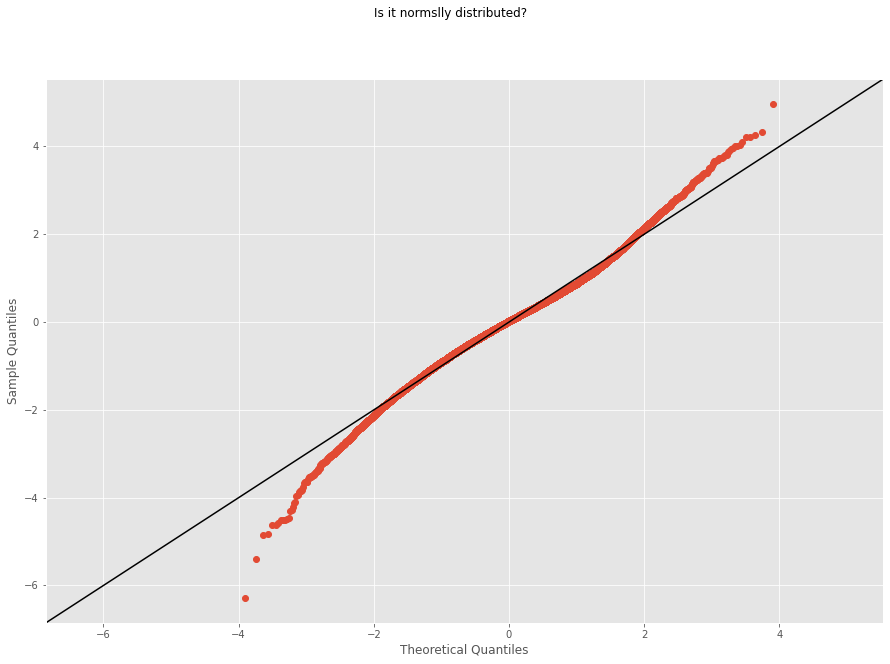

In [30]:
## Testing for Normality
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.qqplot(kc_housing_model.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Is it normslly distributed?");

Text(0.5, 0.98, 'Normal distribution?')

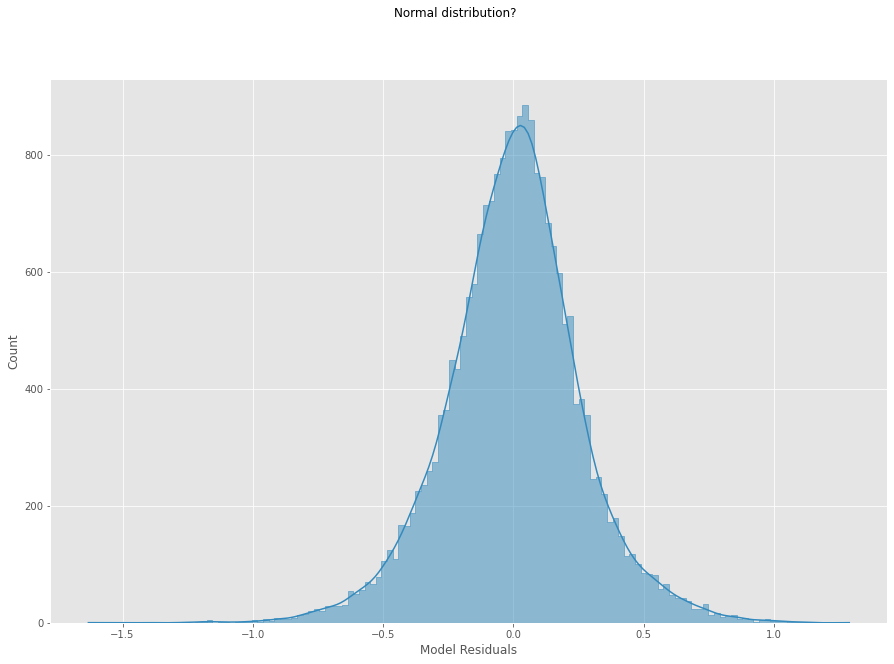

In [32]:
#plotting the residuals to test for normality
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(kc_housing_model.resid, bins='auto', element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Normal distribution?")

#### Evaluating the model
 The study uses the mean squared error and the root mean squared error to evaluate the model.
 If the values are close to zero then the models are generally okay.

In [33]:
# Generate predictions for y using the fitted model
y_pred = kc_housing_model.predict(sm.add_constant(X_in))

# Importing the library necessary for RMSE and MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Finding the MAE
mae = mean_absolute_error(y, y_pred)

# Finding the RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

print(f" The mean absolute error is {mae} and the root mean squared error is {rmse}")

 The mean absolute error is 0.1960228932414789 and the root mean squared error is 0.2594264916344708


The model is good overally.

### Conclusion
* The study seems to be in line with the findings from the Data Understanding that houses that have a waterfront and are located in *zip_C* i.e Bellevue, Mercer Island and Newcastle have some of the highest prices
* The coefficient of bedrooms is negative since as discussed earlier in the Data Understanding, if optimal number of bedrooms is between 6 - 8 and past that if the number of bedrooms is not accompanied by an increase in *sqft_above* then the price starts to decrease because the space is now congested and thus less desirable.
* Houses of a very good condition seem to be have the optimal prices in comparison to houses of a poor condition.

### Recommendation
* The study is of the position that the model can be used to predict the prices of houses in King County. The findings of the linear regression model are in agreement with the findings from the Data Understanding.
* The houses with the best 'value-for-your-money' are houses located in *Zip_C* with a waterfront, being in at least a very good condition, with around 6 - 8 bedrooms.
* Another location that one could consider as returning a good 'value-for-your-money' are houses that are found in location *Zip_G* i.e Sammamish, Issaquah, Carnation and Duvall if in case you are on a relatively 'tight' budget.
* The location with the most economical prices overally is *Zip_A* i.e Seattle, Shoreline and Lake Forest Park. If one is looking to reduce your spending on houses then one would consider this area and get a house that is in a good condition with not more than 8 bedrooms.